In [1]:
from lut3d import *
import numpy as np
import cv2
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import os
from lut1d import *

In [2]:
class Mymodel(nn.Module):
    def __init__(self):
        super(Mymodel, self).__init__()
        self.lut1d = Lut1D(64)
        self.lut3d = Lut3D(17)
    
    def forward(self, x):
        x = self.lut1d(x)
        x = torch.clamp(x, 0, 1)
        x = self.lut3d(x)
        return x

In [3]:
creition = torch.nn.L1Loss()

In [4]:
def inference(lut, img_file):
    img = cv2.imread(img_file)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB).astype(np.float32)
    img /= 255.
    img = np.expand_dims(img, 0)
    img = torch.tensor(img)
    img = torch.permute(img, (0,3,1,2))
    
    with torch.no_grad():
        new_img = lut(img)
        imgS = new_img.cpu().detach()
        imgS = torch.squeeze(imgS)
        imgS = torch.permute(imgS, (1,2,0)).numpy()
        imgS *= 255
        imgS = imgS.astype(np.uint8)
        plt.figure(figsize=(10,10))
        plt.axis('off')
        plt.imshow(imgS)
        plt.show()

In [ ]:
lut = Lut3D()
optimizer = optim.Adam(lut.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0)

In [127]:
file_name =  "./umbrellaL.png"
basename = os.path.basename(file_name).split('.')[0]
img = cv2.imread(file_name)
target = cv2.imread('{}_out.jpg'.format(basename))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB).astype(np.float32)
target = cv2.cvtColor(target, cv2.COLOR_BGR2RGB).astype(np.float32)
imgRaw = img/255.
targetRaw = target / 255.
img = np.expand_dims(imgRaw, 0)
img = torch.tensor(img)
img = torch.permute(img, (0,3,1,2))
target = np.expand_dims(targetRaw, 0)
target = torch.tensor(target)
target = torch.permute(target, (0,3,1,2))

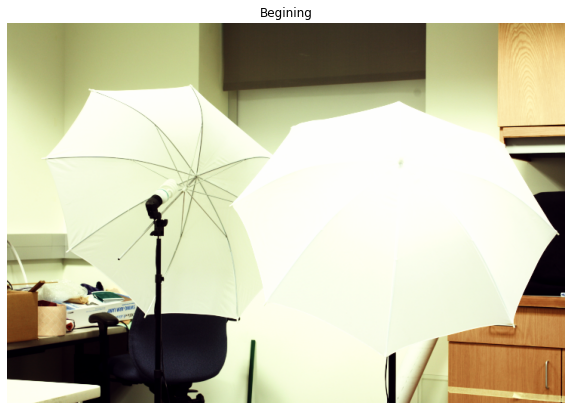

In [128]:
with torch.no_grad():
    new_img = lut(img)
    imgS = new_img.cpu().detach()
    imgS = torch.squeeze(imgS)
    imgS = torch.permute(imgS, (1,2,0)).numpy()
    imgS *= 255
    imgS = imgS.astype(np.uint8)
    plt.figure(figsize=(10,10))
    plt.axis('off')
    plt.imshow(imgS)
    plt.title("Begining")
    plt.show()

In [122]:
def lut_loss(lut):
    less = (lut[(lut < 0)]) ** 2
    upper = (lut[(lut > 1)] - 1) ** 2
    dx = lut[:, :-1, :, :] - lut[:, 1:, :, :]
    dy = lut[:, :, :-1, :] - lut[:, :, 1:, :]
    dz = lut[:, :, :, :-1] - lut[:, :, :, 1:]
    mn =  torch.relu(dx).mean() + torch.relu(dy).mean() + torch.relu(dz).mean()
    tv =  torch.mean(dx ** 2) + torch.mean(dy ** 2)  + torch.mean(dz ** 2)
    return less.sum() + upper.sum() + mn + tv

In [129]:
for i in range(1000):
    new_img = lut(img)
    lut_l = lut_loss(lut.LUT)
    l1_l = creition(new_img, target)
    loss = lut_l + l1_l
    if (i+1) % 100 == 0:
        print("Epoch: {}, loss: {:4f}, lut loss {:.4f}, l1 loss {:.4f}".format(i+1, loss, lut_l, l1_l))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch: 100, loss: 0.007887, lut loss 0.0031, l1 loss 0.0047
Epoch: 200, loss: 0.007703, lut loss 0.0030, l1 loss 0.0047
Epoch: 300, loss: 0.007560, lut loss 0.0028, l1 loss 0.0047
Epoch: 400, loss: 0.007450, lut loss 0.0027, l1 loss 0.0047
Epoch: 500, loss: 0.007357, lut loss 0.0026, l1 loss 0.0047
Epoch: 600, loss: 0.007277, lut loss 0.0026, l1 loss 0.0047
Epoch: 700, loss: 0.007209, lut loss 0.0025, l1 loss 0.0047
Epoch: 800, loss: 0.007145, lut loss 0.0024, l1 loss 0.0047
Epoch: 900, loss: 0.007092, lut loss 0.0024, l1 loss 0.0047
Epoch: 1000, loss: 0.007048, lut loss 0.0023, l1 loss 0.0047


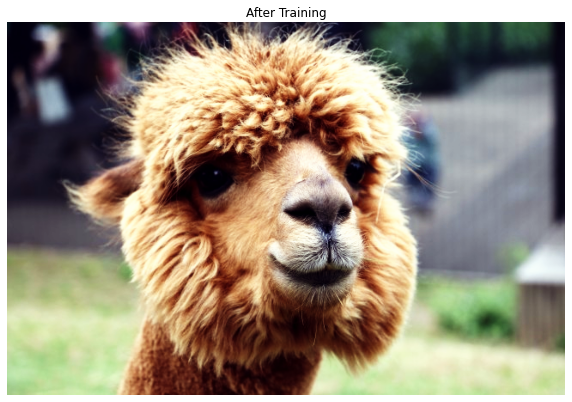

In [124]:
with torch.no_grad():
    new_img = lut(img)
    imgS = new_img.cpu().detach()
    imgS = torch.squeeze(imgS)
    imgS = torch.permute(imgS, (1,2,0)).numpy()
    imgS *= 255
    imgS = imgS.astype(np.uint8)
    plt.figure(figsize=(10,10))
    plt.axis('off')
    plt.imshow(imgS)
    plt.title("After Training")
    plt.show()

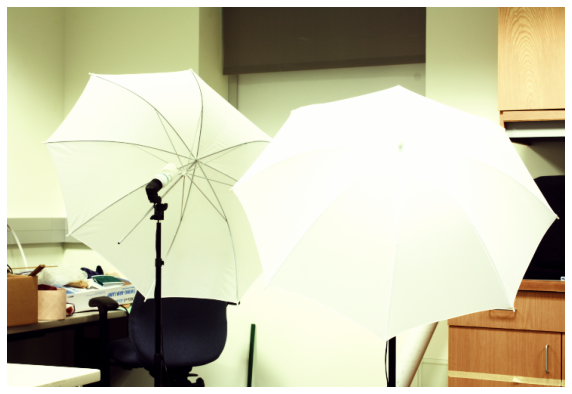

In [126]:
inference(lut,"./umbrellaL.png")

# 1D LUT

In [3]:
lut = Lut1D(256)
optimizer = optim.Adam(lut.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0)

In [8]:
file_name =  "./C1_Drago1.png"
basename = os.path.basename(file_name).split('.')[0]
img = cv2.imread(file_name)
target = cv2.imread('{}_out.png'.format(basename))
img = cv2.resize(img, (512,512))
target = cv2.resize(target, (512,512))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB).astype(np.float32)
target = cv2.cvtColor(target, cv2.COLOR_BGR2RGB).astype(np.float32)
imgRaw = img/255.
targetRaw = target / 255.
img = np.expand_dims(imgRaw, 0)
img = torch.tensor(img)
img = torch.permute(img, (0,3,1,2))
target = np.expand_dims(targetRaw, 0)
target = torch.tensor(target)
target = torch.permute(target, (0,3,1,2))

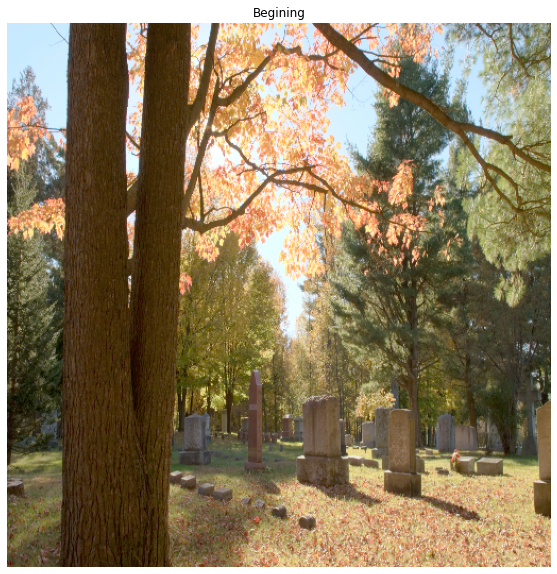

In [9]:
with torch.no_grad():
    new_img = lut(img)
    imgS = new_img.cpu().detach()
    imgS = torch.squeeze(imgS)
    imgS = torch.permute(imgS, (1,2,0)).numpy()
    imgS *= 255
    imgS = imgS.astype(np.uint8)
    plt.figure(figsize=(10,10))
    plt.axis('off')
    plt.imshow(imgS)
    plt.title("Begining")
    plt.show()

In [23]:
creition = torch.nn.L1Loss()

In [11]:
for i in range(1000):
    new_img = lut(img)
    lut_l = Lut1D.lut_loss(lut.LUT)
    l1_l = creition(new_img, target)
    loss = lut_l + l1_l
    if (i+1) % 100 == 0:
        print("Epoch: {}, loss: {:4f}, lut loss {:.4f}, l1 loss {:.4f}".format(i+1, loss, lut_l, l1_l))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch: 100, loss: 0.019351, lut loss 0.0000, l1 loss 0.0193
Epoch: 200, loss: 0.019353, lut loss 0.0000, l1 loss 0.0194
Epoch: 300, loss: 0.019351, lut loss 0.0000, l1 loss 0.0194
Epoch: 400, loss: 0.019351, lut loss 0.0000, l1 loss 0.0193
Epoch: 500, loss: 0.019347, lut loss 0.0000, l1 loss 0.0193
Epoch: 600, loss: 0.019356, lut loss 0.0000, l1 loss 0.0194
Epoch: 700, loss: 0.019357, lut loss 0.0000, l1 loss 0.0194
Epoch: 800, loss: 0.019354, lut loss 0.0000, l1 loss 0.0193
Epoch: 900, loss: 0.019348, lut loss 0.0000, l1 loss 0.0193
Epoch: 1000, loss: 0.019352, lut loss 0.0000, l1 loss 0.0194


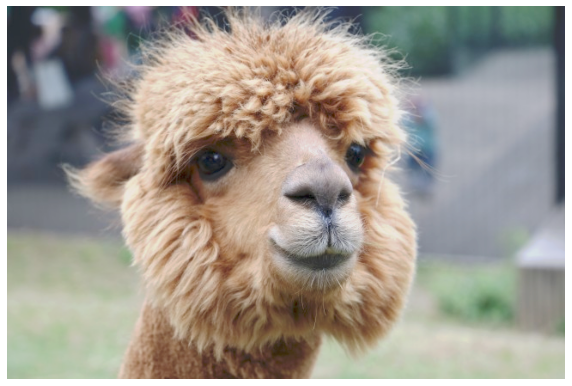

In [17]:
inference(lut, './0003.jpg')

# Hybird

In [5]:
lut = Mymodel()
optimizer = optim.Adam(lut.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0)

In [6]:
file_name =  "./C1_Drago1.png"
basename = os.path.basename(file_name).split('.')[0]
img = cv2.imread(file_name)
target = cv2.imread('{}_out.png'.format(basename))
img = cv2.resize(img, (512,512))
target = cv2.resize(target, (512,512))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB).astype(np.float32)
target = cv2.cvtColor(target, cv2.COLOR_BGR2RGB).astype(np.float32)
imgRaw = img/255.
targetRaw = target / 255.
img = np.expand_dims(imgRaw, 0)
img = torch.tensor(img)
img = torch.permute(img, (0,3,1,2))
target = np.expand_dims(targetRaw, 0)
target = torch.tensor(target)
target = torch.permute(target, (0,3,1,2))

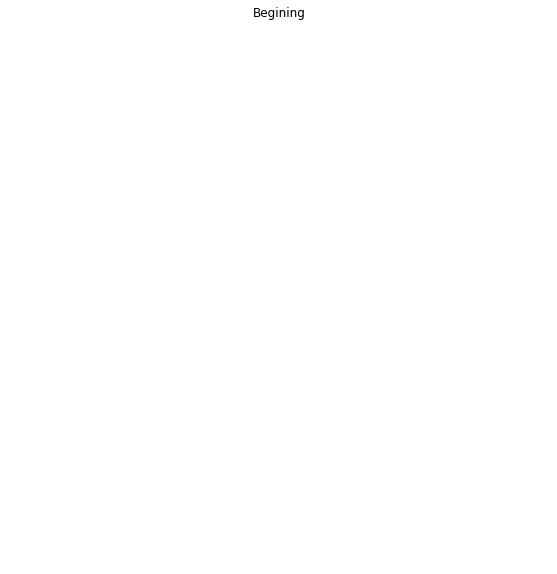

In [7]:
with torch.no_grad():
    new_img = lut(img)
    imgS = new_img.cpu().detach()
    imgS = torch.squeeze(imgS)
    imgS = torch.permute(imgS, (1,2,0)).numpy()
    imgS *= 255
    imgS = imgS.astype(np.uint8)
    plt.figure(figsize=(10,10))
    plt.axis('off')
    plt.imshow(imgS)
    plt.title("Begining")
    plt.show()

In [15]:
for i in range(1000):
    new_img = lut(img)
    lut1d_l = Lut1D.lut_loss(lut.lut1d.LUT)
    lut3d_l = Lut3D.lut_loss(lut.lut3d.LUT)
    l1_l = creition(new_img, target)
    loss = lut1d_l + lut3d_l + l1_l
    if (i+1) % 100 == 0:
        print("Epoch: {}, loss: {:4f}, lut1d_l loss {:.4f}, lut3d_l loss {:.4f} l1 loss {:.4f}".format(i+1, loss, lut1d_l, lut3d_l, l1_l))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch: 100, loss: 0.013239, lut1d_l loss 0.0000, lut3d_l loss 0.0062 l1 loss 0.0071
Epoch: 200, loss: 0.012769, lut1d_l loss 0.0000, lut3d_l loss 0.0060 l1 loss 0.0068
Epoch: 300, loss: 0.012405, lut1d_l loss 0.0000, lut3d_l loss 0.0059 l1 loss 0.0065
Epoch: 400, loss: 0.012111, lut1d_l loss 0.0000, lut3d_l loss 0.0057 l1 loss 0.0064
Epoch: 500, loss: 0.011860, lut1d_l loss 0.0000, lut3d_l loss 0.0056 l1 loss 0.0063
Epoch: 600, loss: 0.011640, lut1d_l loss 0.0000, lut3d_l loss 0.0055 l1 loss 0.0062
Epoch: 700, loss: 0.011441, lut1d_l loss 0.0000, lut3d_l loss 0.0053 l1 loss 0.0061
Epoch: 800, loss: 0.011258, lut1d_l loss 0.0000, lut3d_l loss 0.0052 l1 loss 0.0060
Epoch: 900, loss: 0.011091, lut1d_l loss 0.0000, lut3d_l loss 0.0051 l1 loss 0.0060
Epoch: 1000, loss: 0.010934, lut1d_l loss 0.0000, lut3d_l loss 0.0050 l1 loss 0.0059


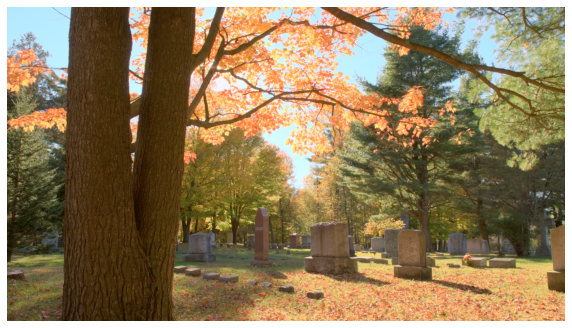

In [16]:
inference(lut, "./C1_Drago1.png")

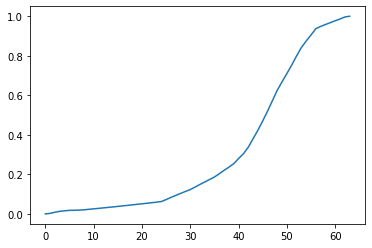

In [17]:
plt.plot(lut.lut1d.LUT.detach().data)

In [18]:
lut

Mymodel(
  (lut1d): Lut1D()
  (lut3d): Lut3D(
    (interpolation): TrilinearInterpolation()
  )
)

In [19]:
lut.lut1d.LUT.grad

tensor([ 6.6372e-05,  1.4095e-04,  6.9761e-06,  4.7276e-06,  1.4708e-04,
        -3.7050e-06, -1.9509e-05, -2.7629e-06,  3.4616e-05, -1.2293e-05,
        -3.6909e-05, -5.2885e-05, -4.4567e-05, -3.9944e-05, -2.7058e-05,
        -1.9701e-05, -2.5310e-05, -4.0705e-05, -8.8870e-06, -2.0044e-05,
         3.7391e-06,  1.8176e-05,  3.9359e-05,  3.7610e-05,  6.6533e-06,
        -1.4108e-05,  5.0565e-06,  2.1407e-05,  1.3150e-05,  2.4369e-05,
         1.3973e-05, -2.2335e-05, -3.2387e-05, -1.7862e-05, -8.7208e-06,
        -3.4438e-05, -3.4048e-05, -7.3298e-06, -3.7266e-05, -3.2371e-05,
         1.8175e-05,  2.4681e-06, -4.2083e-05, -2.0619e-04, -3.8790e-04,
        -1.2068e-04,  2.6852e-05,  1.4484e-04, -5.3974e-05, -3.5904e-06,
        -2.4818e-05, -4.2500e-05, -1.6187e-05, -5.0560e-06,  3.7249e-05,
        -2.9007e-05, -1.8168e-04, -4.6099e-04, -1.1943e-03, -1.1033e-03,
        -6.9560e-04, -4.0686e-04, -5.4907e-04, -3.1186e-04])